In [1]:
pwd()
using Pkg; Pkg.activate("../../FermiCG/")
using FermiCG, NPZ, JLD2
using Plots

readdir()

  Activating project at `~/code/FermiCG`


25-element Vector{String}:
 ".ipynb_checkpoints"
 "README.md"
 "Untitled.ipynb"
 "cis_sa_density_mat.npy"
 "clustering.ipynb"
 "clustering_2.ipynb"
 "density_mat.npy"
 "geometry_1.xyz"
 "integrals_h0.npz"
 "integrals_h1.npz"
 "integrals_h2.npz"
 "integrals_single_precision.npz"
 "mo_coeffs_act.npy"
 "mo_coeffs_doc.npy"
 "nat_orb_active_space.out"
 "nat_orb_active_space.py"
 "orbitals.molden"
 "overlap_mat.npy"
 "rhf.out"
 "rhf.py"
 "rhf_mo_coeffs.npy"
 "scf.fchk"
 "scf.ipynb"
 "tet-4mer-rhf.py"
 "venv"

In [11]:
# build this just so we can print out molden files to view the MOs
molecule = "
H           -3.426100        -2.240400         5.488400
H           -5.627400        -1.077000         5.214700
C           -3.653500        -1.732700         4.551600
H           -1.767100        -2.237000         3.663900
C           -4.907300        -1.068800         4.394700
H           -6.163100         0.096400         3.101400
C           -2.725800        -1.732100         3.540600
H           -0.300300         1.083200        -5.235700
C           -5.209800        -0.419000         3.224900
C           -2.996100        -1.063600         2.307300
H           -1.103000        -1.532900         1.397700
H           -0.427000        -0.802900        -0.856600
H            0.236100        -0.097900        -3.127300
C           -1.019300         1.073000        -4.415000
H           -2.498800         2.251900        -5.503400
C           -4.274000        -0.392400         2.144500
H           -5.501500         0.794400         0.831000
C           -2.061300        -1.027200         1.271800
C           -1.382000        -0.289500        -0.977200
C           -0.717100         0.418000        -3.247600
C           -2.272000         1.739500        -4.569000
H           -4.157600         2.241200        -3.678700
C           -4.546300         0.281700         0.953400
C           -2.324300        -0.340200         0.070400
C           -1.652800         0.387400        -2.167000
C           -3.199800         1.734100        -3.558400
C           -3.604400         0.330900        -0.094300
C           -2.930200         1.059100        -2.329200
C           -3.866500         1.018700        -1.295500
H           -4.824300         1.525600        -1.421700
H            6.954300         5.020900        -5.781400
H            9.130800         5.788500        -4.794600
C            7.130300         4.913900        -4.709900
H            5.199700         4.047800        -4.322900
C            8.368100         5.351000        -4.148200
H            9.543000         5.570100        -2.368400
C            6.155900         4.370100        -3.908500
H            4.469100         3.270900        -2.103400
C            8.601900         5.233600        -2.800800
C            6.366300         4.207300        -2.503300
C            5.408400         3.620800        -1.673100
C            7.624000         4.655100        -1.933900
H            8.793800         4.849500        -0.136000
H            3.726000         2.535700         0.128600
C            5.630800         3.465600        -0.289200
C            7.849900         4.509800        -0.563800
C            4.668600         2.877900         0.557100
C            6.887300         3.923700         0.283000
H            8.046600         4.121200         2.098700
H            2.974600         1.818600         2.362500
C            4.893400         2.733400         1.927600
C            7.108600         3.769300         1.667200
C            3.915400         2.155900         2.795000
H            3.383500         1.608200         4.789600
C            6.150200         3.183400         2.497000
H            7.316000         3.346600         4.316500
C            4.148200         2.042400         4.143100
C            6.360000         3.023000         3.902600
C            5.385400         2.480900         4.704600
H            5.560600         2.377300         5.776700
H            1.028200         5.020900        -5.781400
H            3.204700         5.788500        -4.794600
C            1.204300         4.913900        -4.709900
H           -0.726400         4.047800        -4.322900
C            2.442000         5.351000        -4.148200
H            3.616900         5.570100        -2.368400
C            0.229800         4.370100        -3.908500
H           -1.457000         3.270900        -2.103400
C            2.675800         5.233600        -2.800800
C            0.440300         4.207300        -2.503300
C           -0.517600         3.620800        -1.673100
C            1.697900         4.655100        -1.933900
H            2.867800         4.849500        -0.136000
H           -2.200000         2.535700         0.128600
H           -2.951500         1.818600         2.362500
C           -0.295200         3.465600        -0.289200
C            1.923900         4.509800        -0.563800
H           -2.542500         1.608200         4.789600
C           -1.257500         2.877900         0.557100
C           -2.010600         2.155900         2.795000
C            0.961300         3.923700         0.283000
H            2.120600         4.121200         2.098700
C           -1.777900         2.042400         4.143100
H           -0.365500         2.377300         5.776700
C           -1.032700         2.733400         1.927600
C            1.182500         3.769300         1.667200
C           -0.540600         2.480900         4.704600
C            0.224100         3.183400         2.497000
C            0.434000         3.023000         3.902600
H            1.389900         3.346600         4.316500
H            3.427300         2.251900        -5.503400
H            5.625800         1.083200        -5.235700
C            3.654100         1.739500        -4.569000
H            1.768500         2.241200        -3.678700
H            0.298700        -1.077000         5.214700
C            4.906700         1.073000        -4.415000
H            6.162100        -0.097900        -3.127300
C            2.726300         1.734100        -3.558400
H           -0.237000         0.096400         3.101400
C            1.018700        -1.068800         4.394700
H            2.500000        -2.240400         5.488400
H            0.424600         0.794400         0.831000
H            1.101800         1.525600        -1.421700
C            5.209000         0.418000        -3.247600
C            2.995900         1.059100        -2.329200
C            0.716200        -0.419000         3.224900
C            2.272600        -1.732700         4.551600
H            4.159000        -2.237000         3.663900
C            1.379700         0.281700         0.953400
C            2.059600         1.018700        -1.295500
C            4.273300         0.387400        -2.167000
H            5.499100        -0.802900        -0.856600
C            1.652100        -0.392400         2.144500
C            3.200300        -1.732100         3.540600
C            2.321700         0.330900        -0.094300
C            4.544100        -0.289500        -0.977200
C            2.930000        -1.063600         2.307300
C            3.601700        -0.340200         0.070400
C            3.864800        -1.027200         1.271800
H            4.823000        -1.532900         1.397700
"
atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

basis = "6-31g*"
# 
# Create FermiCG.Molecule type
mol     = Molecule(0, 1, atoms,basis);



In [17]:
#load integrals from disk
ints = InCoreInts(
    npzread("integrals_h0.npy"), 
    npzread("integrals_h1.npy"), 
    npzread("integrals_h2.npy") 
);
C = npzread("mo_coeffs_act.npy")
S = npzread("overlap_mat.npy");
D = npzread("density_mat.npy");


 Laplacian Eigenvalues
    1   0.00000000
    2   0.12056211
    3   0.17217340
    4   0.22807798
    5   0.38185354
    6   0.40757746
    7   0.41881323
    8   0.42862898
    9   0.48778820
   10   0.52228845
   11   0.55301484
   12   0.58392847
   13   0.75655428
   14   0.79992811
   15   0.82548207
   16   0.83089951
   17   0.85993637
   18   0.89247227
   19   0.91665875
   20   0.93934320
   21   0.94318005
   22   0.96831087
   23   0.97298684
   24   0.97688388
   25   0.98377488
   26   0.99014515
   27   0.99641940
   28   0.99960081
   29   1.02734571
   30   1.04010071
   31   1.05340612
   32   1.08513660
   33   1.09339528
   34   1.10082272
   35   1.14151678
   36   1.15023618
   37   1.37186869
   38   1.38136140
   39   1.43084734
   40   1.43558952
[1, 5, 9, 13, 17, 20, 25, 32, 36, 40, 4, 8, 16, 21, 24, 28, 31, 35, 38, 39, 2, 6, 10, 11, 14, 19, 22, 26, 27, 30, 3, 7, 12, 15, 18, 23, 29, 33, 34, 37]

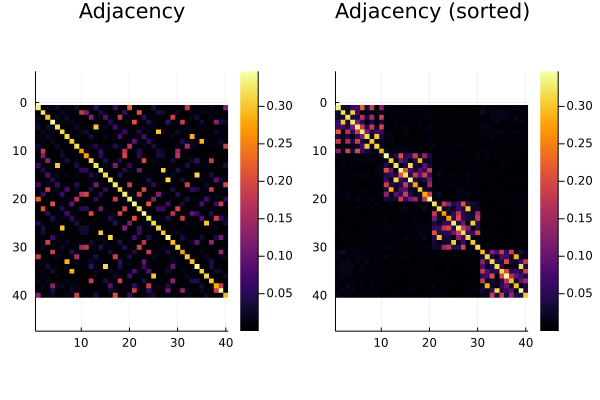

In [19]:
using LinearAlgebra, Printf
using Clustering
using SpectralClustering
using Random
Random.seed!(2)

function cluster_orbitals(A, n_clusters)
    """
    A is adjacency matrix
    """
    
    L = Diagonal([sum(A[i,:]) for i in 1:size(A,1)]) - A;
    F = eigen(L);
    perm = sortperm(F.values, by=abs)
    F.values .= F.values[perm]
    F.vectors .= F.vectors[:,perm]

    print(" Laplacian Eigenvalues\n")
    for (fi_idx, fi) in enumerate(F.values)
        @printf(" %4i %12.8f\n", fi_idx, fi)
    end
    
    p1 = plot(F.values)
    
    A = abs.(F.vectors[:,1:n_clusters]*F.vectors[:,1:n_clusters]')
    p2 = heatmap(abs.(A), aspect_ratio=:equal, title="Projector", yflip = true)
    
    clustering = clusterize(KMeansClusterizer(n_clusters), A).assignments;

    perm = sortperm(clustering)
    p3 = heatmap(abs.(A[perm,perm]), aspect_ratio=:equal, title="Projector", yflip = true)

    clusters = [ [] for i in 1:n_clusters]
    for (idx,i) in enumerate(clustering)
        push!(clusters[i],idx)
    end

    plot(p1, p2, p3, layout = @layout [a; b c])

    return perm, clusters
end

n_clusters = 4
adjacency = abs.(C'*D*C)
perm, cluster_list = cluster_orbitals(adjacency, n_clusters)
print(perm)
    
p1 = heatmap(adjacency, aspect_ratio=:equal, title="Adjacency", yflip = true) 
p2 = heatmap(adjacency[perm, perm], aspect_ratio=:equal, title="Adjacency (sorted)", yflip = true) 

ints_sorted = deepcopy(ints)
ints_sorted.h1 .= ints.h1[perm,perm]
ints_sorted.h2 .= ints.h2[perm,perm,perm,perm];
C_sorted = C[:,perm]
FermiCG.pyscf_write_molden(mol,C_sorted,filename="orbitals.molden");

plot(p1, p2, layout = @layout [a b])

In [21]:
# define clusters
cluster_list = [collect(1:10), collect(11:20), collect(21:30), collect(31:40)]
clusters = [Cluster(i,collect(cluster_list[i])) for i = 1:length(cluster_list)]
init_fspace = [ (5,5) for i in 1:n_clusters]
display(clusters)


4-element Vector{Cluster}:
 Cluster(1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
 Cluster(2, [11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
 Cluster(3, [21, 22, 23, 24, 25, 26, 27, 28, 29, 30])
 Cluster(4, [31, 32, 33, 34, 35, 36, 37, 38, 39, 40])

In [22]:
rdm1 =  C_sorted' * S * D * S * C_sorted * .5

e_cmf, U_cmf, Da, Db  = FermiCG.cmf_oo(ints_sorted, clusters, init_fspace, rdm1, rdm1,
                                        max_iter_oo=150, verbose=0, gconv=1e-6, method="bfgs");

C_cmf = C_sorted * U_cmf
ints_cmf = FermiCG.orbital_rotation(ints_sorted, U_cmf);


 ooCMF Iter:    1 Total= -2754.762024777780 Active= -90.567192047510 G=     1.10e-01
 ooCMF Iter:    2 Total= -2754.766098819053 Active= -90.571266088783 G=     2.99e-02
 ooCMF Iter:    3 Total= -2754.766462610288 Active= -90.571629880018 G=     1.07e-02
 ooCMF Iter:    4 Total= -2754.766525289359 Active= -90.571692559088 G=     7.20e-03
 ooCMF Iter:    5 Total= -2754.766571834865 Active= -90.571739104594 G=     7.19e-03
 ooCMF Iter:    6 Total= -2754.766614021955 Active= -90.571781291684 G=     4.76e-03
 ooCMF Iter:    7 Total= -2754.766623792490 Active= -90.571791062219 G=     2.20e-03
 ooCMF Iter:    8 Total= -2754.766626296293 Active= -90.571793566022 G=     1.58e-03
 ooCMF Iter:    9 Total= -2754.766629105992 Active= -90.571796375721 G=     1.65e-03
 ooCMF Iter:   10 Total= -2754.766630489546 Active= -90.571797759275 G=     7.71e-04
 ooCMF Iter:   11 Total= -2754.766630740810 Active= -90.571798010539 G=     2.99e-04
 ooCMF Iter:   12 Total= -2754.766630783440 Active= -90.571798053

 * Status: success

 * Candidate solution
    Final objective value:     -2.754767e+03

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 4.17e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.52e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 5.23e-11 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.90e-14 ≰ 0.0e+00
    |g(x)|                 = 8.94e-07 ≤ 1.0e-06

 * Work counters
    Seconds run:   1753  (vs limit Inf)
    Iterations:    21
    f(x) calls:    57
    ∇f(x) calls:   57


 ooCMF Iter:   22 Total= -2754.766630858206 Active= -90.571798127935 G=     6.16e-06
*ooCMF -2754.76663086 


LoadError: UndefVarError: U not defined

In [23]:
C_cmf = C_sorted * U_cmf
ints_cmf = FermiCG.orbital_rotation(ints_sorted, U_cmf);

In [25]:
ints = ints_cmf
C = C_cmf;

In [26]:
max_roots = 10

#
# Build Cluster basis
cluster_bases = FermiCG.compute_cluster_eigenbasis(ints, clusters, verbose=0, max_roots=max_roots,
        init_fspace=init_fspace, rdm1a=Da, rdm1b=Db);
#
# Build ClusteredOperator
clustered_ham = FermiCG.extract_ClusteredTerms(ints, clusters);

#
# Build Cluster Operators
cluster_ops = FermiCG.compute_cluster_ops(cluster_bases, ints);

#
# Add cmf hamiltonians for doing MP-style PT2 
FermiCG.add_cmf_operators!(cluster_ops, cluster_bases, ints, Da, Db, verbose=0);


 Remove duplicates
 Number of terms reduced from  1036 to   472


In [43]:
nroots = 27
ci_vector = FermiCG.TPSCIstate(clusters, FermiCG.FockConfig(init_fspace), R=nroots);
# Add the lowest energy single exciton to basis
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([2,1,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,2,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,2,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,1,2])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([3,1,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,3,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,3,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,1,3])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([4,1,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,4,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,4,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,1,4])] = zeros(Float64,nroots)

ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([2,2,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([2,1,2,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([2,1,1,2])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,2,2,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,2,1,2])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,2,2])] = zeros(Float64,nroots)

# TT states ms=0
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([2,2,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([2,1,2,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([2,1,1,2])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,2,2,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,2,1,2])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,2,2])] = zeros(Float64,nroots)

# Spin-flip states
fspace_0 = FermiCG.FockConfig(init_fspace)

## ba
tmp_fspace = FermiCG.replace(fspace_0, (1,2), ([6,4],[4,6]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (1,3), ([6,4],[4,6]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (1,4), ([6,4],[4,6]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (2,3), ([6,4],[4,6]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (2,4), ([6,4],[4,6]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (3,4), ([6,4],[4,6]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)

## ab
tmp_fspace = FermiCG.replace(fspace_0, (1,2), ([4,6],[6,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (1,3), ([4,6],[6,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (1,4), ([4,6],[6,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (2,3), ([4,6],[6,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (2,4), ([4,6],[6,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (3,4), ([4,6],[6,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)


FermiCG.eye!(ci_vector)

In [48]:
e0, v0 = FermiCG.tpsci_ci(ci_vector, cluster_ops, clustered_ham,
                            thresh_asci =1e-2,     # Threshold of P-space configs to search from
                            thresh_foi  =1e-3,    # Threshold for keeping terms when defining FOIS
                            thresh_cipsi=1e-2, # Threshold for adding to P-space
                            max_iter=10,
                    ci_max_ss_vecs = 3,
                    ci_max_iter = 30,
                            incremental=false,	# turn this off,  as it wasn't well tested for multistate
			    matvec=3);

 ci_vector     : (31, 27)
 thresh_cipsi  : 0.01
 thresh_foi    : 0.001
 thresh_asci   : 0.01
 thresh_var    : -1.0
 max_iter      : 10
 conv_thresh   : 0.0001
 nbody         : 4
 incremental   : false
 ci_conv       : 1.0e-5
 ci_max_iter   : 30
 ci_max_ss_vecs: 3
 davidson      : false
 max_mem_ci    : 20.0
 matvec        : 3


     Selected CI Iteration:    1 epsilon:   0.01000000
 Memory needed to hold full CI matrix:   0.00000769 (Gb)

 |== Tensor Product State CI =======================================
 Hamiltonian matrix dimension =    31: 
 Build full Hamiltonian matrix with dimension:       0.002682 seconds (37.01 k allocations: 852.016 KiB)
 Diagonalize: 
                                      0.000181 seconds (11 allocations: 34.938 KiB)
 Compute S2 expectation values:                      0.006614 seconds (29.57 k allocations: 760.500 KiB)
  Root       Energy           S2
     1 -90.57179817   0.00000000
     2 -90.50402459   2.00000000
     3 -90.50390595   2.00000000
     4 

LoadError: MethodError: no method matching isless(::ComplexF64, ::ComplexF64)
[0mClosest candidates are:
[0m  isless(::Any, [91m::PyCall.PyObject[39m) at ~/.julia/packages/PyCall/L0fLP/src/pyoperators.jl:76
[0m  isless([91m::PyCall.PyObject[39m, ::Any) at ~/.julia/packages/PyCall/L0fLP/src/pyoperators.jl:75
[0m  isless(::Any, [91m::Missing[39m) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/missing.jl:88
[0m  ...